In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

### Scraping data from zingat.com

In [2]:
## Getting the page urls from page 2 to 48
page_urls = []
for page_number in np.arange(2,49):
  page_urls.append("https://www.zingat.com/satilik-daire?page="+str(page_number))

page_urls[0:5]

['https://www.zingat.com/satilik-daire?page=2',
 'https://www.zingat.com/satilik-daire?page=3',
 'https://www.zingat.com/satilik-daire?page=4',
 'https://www.zingat.com/satilik-daire?page=5',
 'https://www.zingat.com/satilik-daire?page=6']

In [3]:
page_contents = []
for page in page_urls:
    req = requests.get(page)
    soup = bs(req.text, "html.parser")
    page_contents.append(soup.select(".zl-card-inner"))

In [4]:
## Getting the urls of houses that are for sale.
sale_urls = []
for page in page_contents:
    for link in page:
      sale_urls.append(link.get("href"))

sale_urls[0:10]

['/bodrum-gumusluk-sosyal-tesisli-sitede-manzarali-cati-dubleks-3542775i',
 '/kooperatif-evleri-cevre-site-icinde-dogalgazli-satilik-daire-3605702i',
 '/edirne-merkez-seyirtepe-konaklari-satilik-birinci-kat-3-1-daire-3300044i',
 '/esenyurt-ornek-mahallesinde-sifir-tertemiz-2-1-satilik-daire-3609036i',
 '/kemalpasa-sogukpinar-da-2-1-satilik-daire-3608891i',
 '/osmanbey-metrosu-yakini-bakimli-2-1-daire-3607783i',
 '/buyukcekmecede-merkezi-konumda-3-1-acil-satilik-daire-3559848i',
 '/ekeden-yeni-bir-ev-degil-yeni-bir-yasam-sizi-bekliyor-3553594i',
 '/fethiye-ovacik-bolgesinde-2-1-daire-900-000-tl-3566136i',
 '/aygulden-akcayda-satilik-2-1-yuzme-hvz-kaloriferli-firsat-daire-3610985i']

In [5]:
sale_urls_proper = []
for url in sale_urls:
    sale_urls_proper.append("https://www.zingat.com" + url)
sale_urls_proper[0:10]

['https://www.zingat.com/bodrum-gumusluk-sosyal-tesisli-sitede-manzarali-cati-dubleks-3542775i',
 'https://www.zingat.com/kooperatif-evleri-cevre-site-icinde-dogalgazli-satilik-daire-3605702i',
 'https://www.zingat.com/edirne-merkez-seyirtepe-konaklari-satilik-birinci-kat-3-1-daire-3300044i',
 'https://www.zingat.com/esenyurt-ornek-mahallesinde-sifir-tertemiz-2-1-satilik-daire-3609036i',
 'https://www.zingat.com/kemalpasa-sogukpinar-da-2-1-satilik-daire-3608891i',
 'https://www.zingat.com/osmanbey-metrosu-yakini-bakimli-2-1-daire-3607783i',
 'https://www.zingat.com/buyukcekmecede-merkezi-konumda-3-1-acil-satilik-daire-3559848i',
 'https://www.zingat.com/ekeden-yeni-bir-ev-degil-yeni-bir-yasam-sizi-bekliyor-3553594i',
 'https://www.zingat.com/fethiye-ovacik-bolgesinde-2-1-daire-900-000-tl-3566136i',
 'https://www.zingat.com/aygulden-akcayda-satilik-2-1-yuzme-hvz-kaloriferli-firsat-daire-3610985i']

In [6]:
sale_urls_proper[980:987]

['https://www.zingat.com/manavgat-sarilarda-satilik-daire-3606555i',
 'https://www.zingat.com/keciorende-giris-katta-on-cephe-3-1-satilik-daire-3556399i',
 'https://www.zingat.com/60-evler-merkezde-deniz-manzarali-satilik-3-1-daire-3606974i',
 'https://www.zingat.com/rb-satilik-akcay-2-1-sifir-115m2-kacmaz-fiyat-daire-3604809i',
 'https://www.zingat.com/avcilar-kaleden-2-1genis-kullanimli-luks-arakat-daire-3297731i',
 'https://www.zingat.com/kayabasi-camlibahce-evlerinde-3-1-satilik-lux-daire-3606806i',
 'https://www.zingat.com/bilal-habesi-cami-yakini-satilik-2-1-80-m2-ara-kat-yeni-bina-3553202i']

In [7]:
## We have 987 houses for sale.
len(sale_urls_proper)

987

In [8]:
def soupCreator(url):
    req = requests.get(url)
    soup = bs(req.text, "html.parser") 
    return soup

In [9]:
## An example of how the page structre looks.
soupCreator(sale_urls_proper[0]).find_all(["strong", "span"], {"class": "col-md-6"})

[<strong class="col-md-6">
                                                         İlan no
                                                     </strong>,
 <span class="col-md-6">3542775</span>,
 <strong class="col-md-6">Brüt m²</strong>,
 <span class="col-md-6"> 135</span>,
 <strong class="col-md-6">Net m²</strong>,
 <span class="col-md-6">86</span>,
 <strong class="col-md-6">Oda Sayısı</strong>,
 <span class="col-md-6">
                                                     2+1</span>,
 <strong class="col-md-6">Banyo Sayısı</strong>,
 <span class="col-md-6">
                                                     1</span>,
 <strong class="col-md-6">Binadaki Kat Sayısı</strong>,
 <span class="col-md-6">
                                                     2</span>,
 <strong class="col-md-6">Bulunduğu Kat</strong>,
 <span class="col-md-6">
                                                     Giriş Katı</span>,
 <strong class="col-md-6">Bina Yaşı</strong>,
 <span class="col-md-6">
         

In [10]:
## Getting the features of all houses.
features = []
for url in sale_urls_proper:
    features.append([tag.text.strip() for tag in soupCreator(url).find_all(["strong", "span"], {"class": "col-md-6"})])

In [11]:
features[:5]

[['İlan no',
  '3542775',
  'Brüt m²',
  '135',
  'Net m²',
  '86',
  'Oda Sayısı',
  '2+1',
  'Banyo Sayısı',
  '1',
  'Binadaki Kat Sayısı',
  '2',
  'Bulunduğu Kat',
  'Giriş Katı',
  'Bina Yaşı',
  '5',
  'Isıtma Tipi',
  'Kat Kaloriferi',
  'Mobilya Durumu',
  'Eşyasız',
  'Kullanım Durumu',
  'Boş',
  'Yapının Durumu',
  'İkinci El',
  'Konut Şekli',
  'Çatı Dubleksi',
  'Aidat',
  '170  TL  (aylık)',
  'Kimden',
  'Danışman',
  'Krediye Uygun',
  'Evet'],
 ['İlan no',
  '3605702',
  'Brüt m²',
  '150',
  'Net m²',
  '130',
  'Oda Sayısı',
  '3+1',
  'Banyo Sayısı',
  '1',
  'Binadaki Kat Sayısı',
  '8',
  'Bulunduğu Kat',
  '4',
  'Bina Yaşı',
  '21-25 arası',
  'Isıtma Tipi',
  'Kombi (Doğalgaz)',
  'Kullanım Durumu',
  'Mülk Sahibi',
  'Yapının Durumu',
  'İkinci El',
  'Kimden',
  'Danışman',
  'Görüntülü Ev Gezintisi\n                                                                ?',
  'Evet',
  'Krediye Uygun',
  'Evet'],
 ['İlan no',
  '3300044',
  'Brüt m²',
  '180',
  '

In [12]:
len(features[0][::2])

16

In [13]:
## Getting the maximum number of features that a house has

lengths = []
for feature in features:
    lengths.append(len(feature[::2]))

max(lengths)

23

In [14]:
## Since most of the houses have different number of features, it is better to convert them to a dictionary. 
## Even indices of feature lists will be the keys and odds will be the values.

feature_dicts = []
for feature in features:
   feature_dicts.append(dict(zip(feature[::2], feature[1::2])))

In [15]:
feature_dicts[:5]

[{'İlan no': '3542775',
  'Brüt m²': '135',
  'Net m²': '86',
  'Oda Sayısı': '2+1',
  'Banyo Sayısı': '1',
  'Binadaki Kat Sayısı': '2',
  'Bulunduğu Kat': 'Giriş Katı',
  'Bina Yaşı': '5',
  'Isıtma Tipi': 'Kat Kaloriferi',
  'Mobilya Durumu': 'Eşyasız',
  'Kullanım Durumu': 'Boş',
  'Yapının Durumu': 'İkinci El',
  'Konut Şekli': 'Çatı Dubleksi',
  'Aidat': '170  TL  (aylık)',
  'Kimden': 'Danışman',
  'Krediye Uygun': 'Evet'},
 {'İlan no': '3605702',
  'Brüt m²': '150',
  'Net m²': '130',
  'Oda Sayısı': '3+1',
  'Banyo Sayısı': '1',
  'Binadaki Kat Sayısı': '8',
  'Bulunduğu Kat': '4',
  'Bina Yaşı': '21-25 arası',
  'Isıtma Tipi': 'Kombi (Doğalgaz)',
  'Kullanım Durumu': 'Mülk Sahibi',
  'Yapının Durumu': 'İkinci El',
  'Kimden': 'Danışman',
  'Görüntülü Ev Gezintisi\n                                                                ?': 'Evet',
  'Krediye Uygun': 'Evet'},
 {'İlan no': '3300044',
  'Brüt m²': '180',
  'Net m²': '165',
  'Oda Sayısı': '3+1',
  'Banyo Sayısı': '2',
  

In [16]:
## Creating the dataframe
df = pd.DataFrame(feature_dicts)

In [17]:
df.head()

,İlan no,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Aidat,Kimden,Krediye Uygun,Görüntülü Ev Gezintisi\n ?,Kira Getirisi,Takasa Uygun,Hayvan Dostu,Tapu Durumu,Ada,Parsel
0,3542775,135,86,2+1,1,2,Giriş Katı,5,Kat Kaloriferi,Eşyasız,...,170 TL (aylık),Danışman,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3605702,150,130,3+1,1,8,4,21-25 arası,Kombi (Doğalgaz),NaN,...,NaN,Danışman,Evet,Evet,NaN,NaN,NaN,NaN,NaN,NaN
2,3300044,180,165,3+1,2,4,1,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,100 TL (aylık),Danışman,Evet,Hayır,3.000 TL (aylık),NaN,NaN,NaN,NaN,NaN
3,3609036,100,90,2+1,1,5,2,0,Kombi (Doğalgaz),Eşyasız,...,NaN,NaN,Evet,Hayır,NaN,Evet,Evet,NaN,NaN,NaN
4,3608891,110,100,2+1,1,4,2,6-10 arası,Kombi (Doğalgaz),NaN,...,NaN,Danışman,Evet,NaN,NaN,NaN,NaN,Kat Mülkiyeti,NaN,NaN


In [18]:
## Getting the locations of the houses

locations = []
for url in sale_urls_proper:
   locations.append(soupCreator(url).find("div", {"class" :"detail-location-path__map"}).find("h2").text.replace("\n", "").replace(" ", ""))

In [19]:
locations[0:10]

['Gümüşlük,Bodrum,Muğla',
 'TahsinYazıcı,Karabağlar,İzmir',
 'Şükrüpaşa,EdirneMerkez,Edirne',
 'Örnek,Esenyurt,İstanbul',
 'Soğukpınar,Kemalpaşa,İzmir',
 'Bozkurt,Şişli,İstanbul',
 'Çakmaklı,Büyükçekmece,İstanbul',
 'Merkez,Mezitli,Mersin',
 'Ölüdeniz,Fethiye,Muğla',
 'Akçay,Edremit,Balıkesir']

In [20]:
df["Konum"] = locations

In [21]:
## Keeping only the city and district.

new_locations = []
for location in df["Konum"].str.split(",").str[1:3]:
    new_locations.append(", ".join(location))
    
new_locations[0:5]

['Bodrum, Muğla',
 'Karabağlar, İzmir',
 'EdirneMerkez, Edirne',
 'Esenyurt, İstanbul',
 'Kemalpaşa, İzmir']

In [22]:
df["Konum"] = new_locations
df.head()

,İlan no,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Görüntülü Ev Gezintisi\n ?,Kira Getirisi,Takasa Uygun,Hayvan Dostu,Tapu Durumu,Ada,Parsel,Konum
0,3542775,135,86,2+1,1,2,Giriş Katı,5,Kat Kaloriferi,Eşyasız,...,Danışman,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bodrum, Muğla"
1,3605702,150,130,3+1,1,8,4,21-25 arası,Kombi (Doğalgaz),NaN,...,Danışman,Evet,Evet,NaN,NaN,NaN,NaN,NaN,NaN,"Karabağlar, İzmir"
2,3300044,180,165,3+1,2,4,1,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,Hayır,3.000 TL (aylık),NaN,NaN,NaN,NaN,NaN,"EdirneMerkez, Edirne"
3,3609036,100,90,2+1,1,5,2,0,Kombi (Doğalgaz),Eşyasız,...,NaN,Evet,Hayır,NaN,Evet,Evet,NaN,NaN,NaN,"Esenyurt, İstanbul"
4,3608891,110,100,2+1,1,4,2,6-10 arası,Kombi (Doğalgaz),NaN,...,Danışman,Evet,NaN,NaN,NaN,NaN,Kat Mülkiyeti,NaN,NaN,"Kemalpaşa, İzmir"


In [23]:
## Getting the prices of the houses.

prices = []
for url in sale_urls_proper:
    prices.append(soupCreator(url).find("strong", itemprop = "price").text)

In [24]:
df["Satış Fiyatı"] = prices
df.head()

,İlan no,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Krediye Uygun,Görüntülü Ev Gezintisi\n ?,Kira Getirisi,Takasa Uygun,Hayvan Dostu,Tapu Durumu,Ada,Parsel,Konum,Satış Fiyatı
0,3542775,135,86,2+1,1,2,Giriş Katı,5,Kat Kaloriferi,Eşyasız,...,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bodrum, Muğla",995.000 TL
1,3605702,150,130,3+1,1,8,4,21-25 arası,Kombi (Doğalgaz),NaN,...,Evet,Evet,NaN,NaN,NaN,NaN,NaN,NaN,"Karabağlar, İzmir",559.000 TL
2,3300044,180,165,3+1,2,4,1,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Evet,Hayır,3.000 TL (aylık),NaN,NaN,NaN,NaN,NaN,"EdirneMerkez, Edirne",765.000 TL
3,3609036,100,90,2+1,1,5,2,0,Kombi (Doğalgaz),Eşyasız,...,Evet,Hayır,NaN,Evet,Evet,NaN,NaN,NaN,"Esenyurt, İstanbul",255.000 TL
4,3608891,110,100,2+1,1,4,2,6-10 arası,Kombi (Doğalgaz),NaN,...,Evet,NaN,NaN,NaN,NaN,Kat Mülkiyeti,NaN,NaN,"Kemalpaşa, İzmir",385.000 TL


In [25]:
df.rename(columns= {"Görüntülü Ev Gezintisi\n                                                                ?": "Görüntülü Ev Gezintisi"}, inplace=True) 

In [26]:
df.head()

,İlan no,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Krediye Uygun,Görüntülü Ev Gezintisi,Kira Getirisi,Takasa Uygun,Hayvan Dostu,Tapu Durumu,Ada,Parsel,Konum,Satış Fiyatı
0,3542775,135,86,2+1,1,2,Giriş Katı,5,Kat Kaloriferi,Eşyasız,...,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bodrum, Muğla",995.000 TL
1,3605702,150,130,3+1,1,8,4,21-25 arası,Kombi (Doğalgaz),NaN,...,Evet,Evet,NaN,NaN,NaN,NaN,NaN,NaN,"Karabağlar, İzmir",559.000 TL
2,3300044,180,165,3+1,2,4,1,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Evet,Hayır,3.000 TL (aylık),NaN,NaN,NaN,NaN,NaN,"EdirneMerkez, Edirne",765.000 TL
3,3609036,100,90,2+1,1,5,2,0,Kombi (Doğalgaz),Eşyasız,...,Evet,Hayır,NaN,Evet,Evet,NaN,NaN,NaN,"Esenyurt, İstanbul",255.000 TL
4,3608891,110,100,2+1,1,4,2,6-10 arası,Kombi (Doğalgaz),NaN,...,Evet,NaN,NaN,NaN,NaN,Kat Mülkiyeti,NaN,NaN,"Kemalpaşa, İzmir",385.000 TL


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   İlan no                 987 non-null    object
 1   Brüt m²                 987 non-null    object
 2   Net m²                  987 non-null    object
 3   Oda Sayısı              987 non-null    object
 4   Banyo Sayısı            987 non-null    object
 5   Binadaki Kat Sayısı     930 non-null    object
 6   Bulunduğu Kat           936 non-null    object
 7   Bina Yaşı               930 non-null    object
 8   Isıtma Tipi             926 non-null    object
 9   Mobilya Durumu          881 non-null    object
 10  Kullanım Durumu         921 non-null    object
 11  Yapının Durumu          636 non-null    object
 12  Konut Şekli             730 non-null    object
 13  Aidat                   665 non-null    object
 14  Kimden                  616 non-null    object
 15  Krediy

### Some visualizations.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'İlçe')

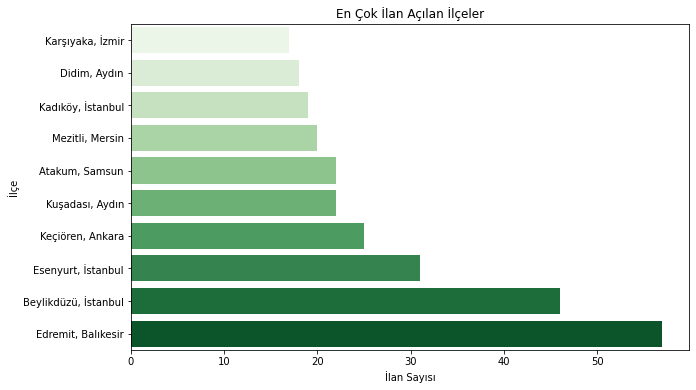

In [29]:
districts = df["Konum"].value_counts()[0:10].sort_values()
plt.figure(figsize=(10,6))
plot = sns.barplot(x = districts.values, y = districts.index, palette="Greens")
plt.title("En Çok İlan Açılan İlçeler")
plt.xlabel("İlan Sayısı")
plt.ylabel("İlçe")

In [30]:
## Removing the currency tag from prices.
new_prices = []
for price in df["Satış Fiyatı"]:
    new_prices.append(price.split(" ")[0])

In [31]:
new_prices[0:5]

['995.000', '559.000', '765.000', '255.000', '385.000']

In [32]:
df["Aidat"] = df["Aidat"].str.split(" ").str[0]
df["Kira Getirisi"] = df["Kira Getirisi"].str.split(" ").str[0]
df["Satış Fiyatı"] = new_prices
df.head()

,İlan no,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Krediye Uygun,Görüntülü Ev Gezintisi,Kira Getirisi,Takasa Uygun,Hayvan Dostu,Tapu Durumu,Ada,Parsel,Konum,Satış Fiyatı
0,3542775,135,86,2+1,1,2,Giriş Katı,5,Kat Kaloriferi,Eşyasız,...,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bodrum, Muğla",995.000
1,3605702,150,130,3+1,1,8,4,21-25 arası,Kombi (Doğalgaz),NaN,...,Evet,Evet,NaN,NaN,NaN,NaN,NaN,NaN,"Karabağlar, İzmir",559.000
2,3300044,180,165,3+1,2,4,1,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Evet,Hayır,3.000,NaN,NaN,NaN,NaN,NaN,"EdirneMerkez, Edirne",765.000
3,3609036,100,90,2+1,1,5,2,0,Kombi (Doğalgaz),Eşyasız,...,Evet,Hayır,NaN,Evet,Evet,NaN,NaN,NaN,"Esenyurt, İstanbul",255.000
4,3608891,110,100,2+1,1,4,2,6-10 arası,Kombi (Doğalgaz),NaN,...,Evet,NaN,NaN,NaN,NaN,Kat Mülkiyeti,NaN,NaN,"Kemalpaşa, İzmir",385.000


In [33]:
## Converting variables to appropriate type.

df["Brüt m²"] = df["Brüt m²"].astype("int")
df["Net m²"] = df["Net m²"].astype("int")
df["Aidat"] = pd.to_numeric(df["Aidat"], errors="coerce")
df["Kira Getirisi"] = pd.to_numeric(df["Kira Getirisi"], errors="coerce")
df["Satış Fiyatı"] = df["Satış Fiyatı"].str.replace(".", "").astype("int")

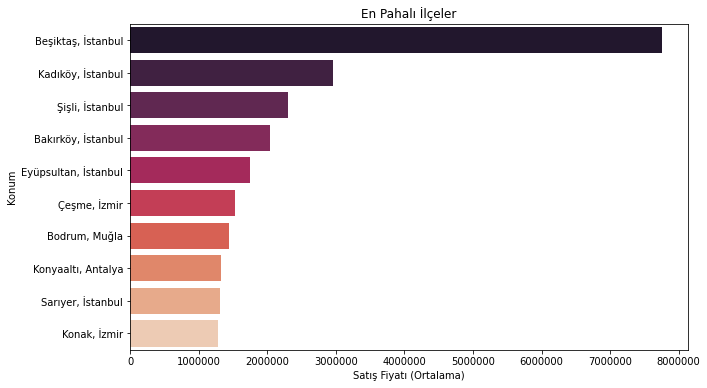

In [34]:
## Most expensive 10 districts on average
apt_price_top_ten = df.groupby(df["Konum"]).mean().sort_values("Satış Fiyatı", ascending=False).round()[0:10]["Satış Fiyatı"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = apt_price_top_ten.values, y = apt_price_top_ten.index, palette="rocket")
plt.xlabel("Satış Fiyatı (Ortalama)")
plt.title("En Pahalı İlçeler")
plt.ticklabel_format(style = "plain", axis = "x")

Text(0.5, 1.0, 'Apartmanların Yaş Durumu')

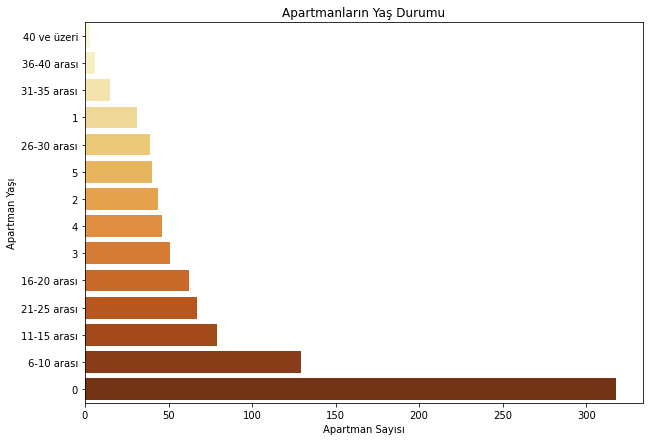

In [35]:
apt_age = df["Bina Yaşı"].value_counts().sort_values(ascending=True)
plt.figure(figsize = (10,7))
sns.barplot(x = apt_age.values, y = apt_age.index, palette="YlOrBr", orient="h")
plt.xlabel("Apartman Sayısı")
plt.ylabel("Apartman Yaşı")
plt.title("Apartmanların Yaş Durumu")

Text(0.0, 1.0, 'Isıtma Tipi')

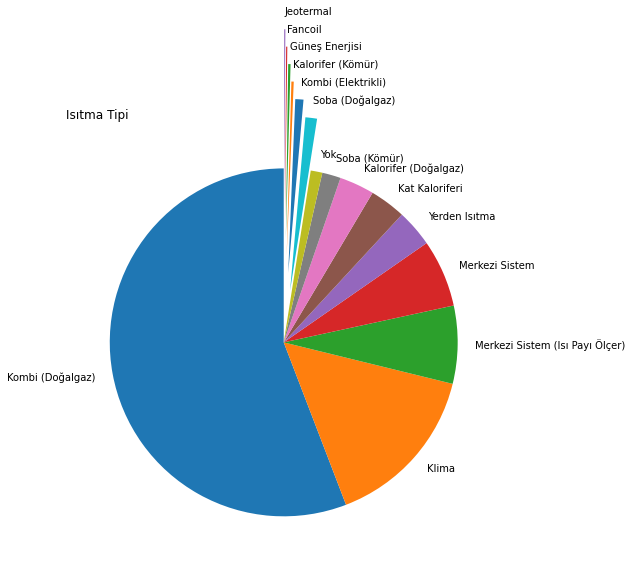

In [37]:
ısıtma_tipi = df["Isıtma Tipi"].value_counts()
plt.figure(figsize = (8,8))
explode = (0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.3,0.4,0.5,0.6,0.7, 0.8)
plt.pie(x = ısıtma_tipi.values, labels=ısıtma_tipi.index, explode = explode, startangle = 90)
plt.title("Isıtma Tipi", loc = "left")

Text(0.5, 1.0, 'Kimden')

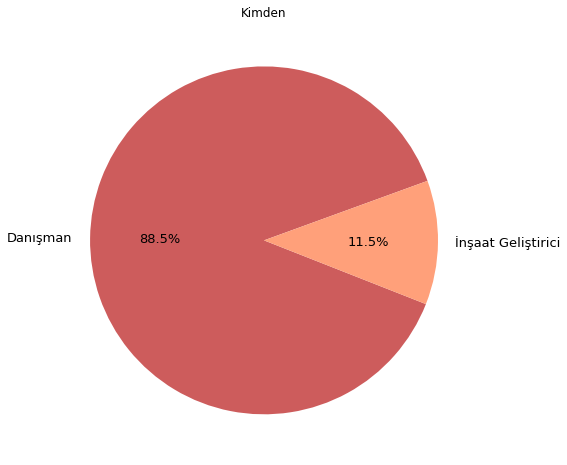

In [38]:
kimden = df["Kimden"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x = kimden.values, labels = kimden.index, autopct="%1.1f%%",startangle = 20, textprops={'fontsize': 13}, colors=["#CD5C5C","#FFA07A"])
plt.title("Kimden")